In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os
import csv
from pathlib import Path

In [6]:
plotting_folder = 'to_plot'
plotting_folder_path = Path(plotting_folder)
data_files = list(plotting_folder_path.glob('*.csv'))
print(f"plotting files: {data_files}")

plotting files: [WindowsPath('to_plot/BR_21_18.csv'), WindowsPath('to_plot/BR_21_20.csv')]


In [7]:
def plot_training_history(csv_list):
    import numpy as np
    import matplotlib.pyplot as plt
    import csv

    # Lists to hold per-run metrics
    all_train_loss = []
    all_val_loss = []
    all_train_f1 = []
    all_val_f1 = []
    all_train_acc = []
    all_val_acc = []

    # Read all CSVs and collect metrics
    min_len = None
    for csv_file in csv_list:
        train_loss, val_loss = [], []
        train_f1, val_f1 = [], []
        train_acc, val_acc = [], []
        with open(csv_file, 'r', encoding='utf-8') as f:
            reader = csv.DictReader(f)
            for row in reader:
                train_loss.append(float(row['train_loss']))
                val_loss.append(float(row['val_loss']))
                train_f1.append(float(row['train_f1']))
                val_f1.append(float(row['val_f1']))
                train_acc.append(float(row['train_accuracy']))
                val_acc.append(float(row['val_accuracy']))
        # Track the minimum length
        if min_len is None or len(train_loss) < min_len:
            min_len = len(train_loss)
        all_train_loss.append(train_loss)
        all_val_loss.append(val_loss)
        all_train_f1.append(train_f1)
        all_val_f1.append(val_f1)
        all_train_acc.append(train_acc)
        all_val_acc.append(val_acc)

    # Truncate all lists to the minimum length
    def truncate(lst):
        return [x[:min_len] for x in lst]

    all_train_loss = np.array(truncate(all_train_loss))
    all_val_loss = np.array(truncate(all_val_loss))
    all_train_f1 = np.array(truncate(all_train_f1))
    all_val_f1 = np.array(truncate(all_val_f1))
    all_train_acc = np.array(truncate(all_train_acc))
    all_val_acc = np.array(truncate(all_val_acc))

    epochs = np.arange(1, min_len + 1)

    # Helper to plot mean and std
    def plot_metric(mean_train, std_train, mean_val, std_val, ylabel, title):
        plt.figure(figsize=(8, 5))
        plt.plot(epochs, mean_train, color='blue', label='Training')
        plt.fill_between(epochs, mean_train - std_train, mean_train + std_train, color='blue', alpha=0.2)
        plt.plot(epochs, mean_val, color='orange', label='Validation')
        plt.fill_between(epochs, mean_val - std_val, mean_val + std_val, color='orange', alpha=0.2)
        plt.xlabel('Epoch')
        plt.ylabel(ylabel)
        plt.title(title)
        plt.legend()
        plt.grid(True)
        plt.show()

    # Compute mean and std for each metric
    mean_train_loss = np.mean(all_train_loss, axis=0)
    std_train_loss = np.std(all_train_loss, axis=0)
    mean_val_loss = np.mean(all_val_loss, axis=0)
    std_val_loss = np.std(all_val_loss, axis=0)

    mean_train_f1 = np.mean(all_train_f1, axis=0)
    std_train_f1 = np.std(all_train_f1, axis=0)
    mean_val_f1 = np.mean(all_val_f1, axis=0)
    std_val_f1 = np.std(all_val_f1, axis=0)

    mean_train_acc = np.mean(all_train_acc, axis=0)
    std_train_acc = np.std(all_train_acc, axis=0)
    mean_val_acc = np.mean(all_val_acc, axis=0)
    std_val_acc = np.std(all_val_acc, axis=0)

    # Plot Loss
    plot_metric(mean_train_loss, std_train_loss, mean_val_loss, std_val_loss, 'Loss', 'Mean Training and Validation Loss')

    # Plot F1
    plot_metric(mean_train_f1, std_train_f1, mean_val_f1, std_val_f1, 'F1 Score', 'Mean Training and Validation F1 Score')

    # Plot Accuracy
    plot_metric(mean_train_acc, std_train_acc, mean_val_acc, std_val_acc, 'Accuracy', 'Mean Training and Validation Accuracy')

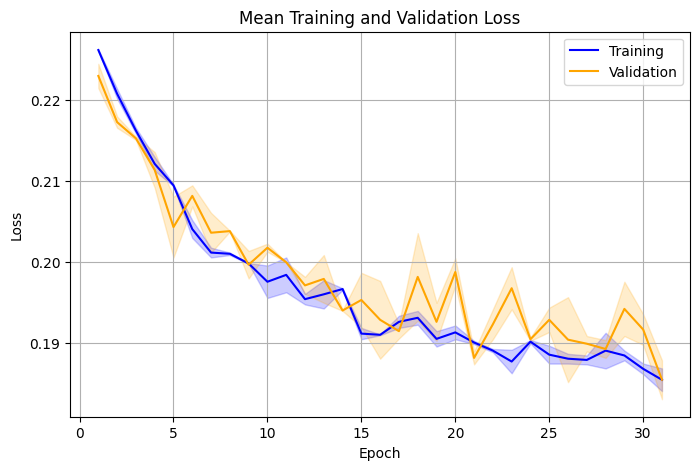

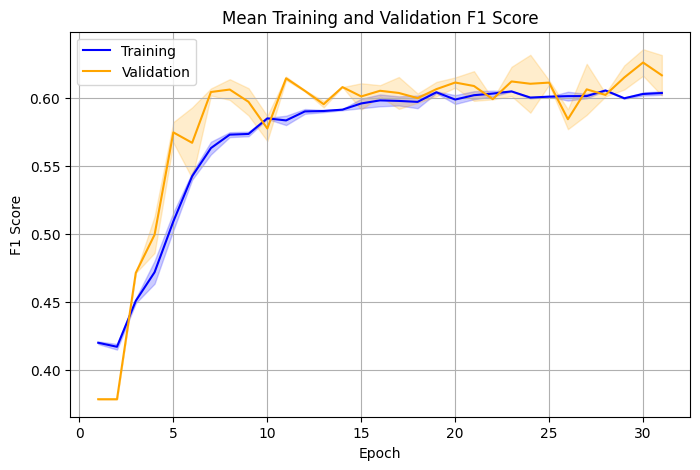

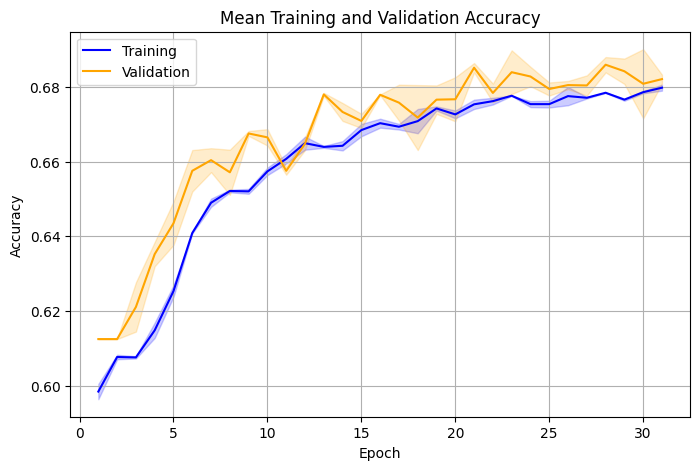

In [8]:
csv_list = []
for csv_file in data_files:
    if os.path.isfile(csv_file):
        csv_list.append(csv_file)
    else:
        print(f"File {csv_file} does not exist.")
        exit(1)
if len(csv_list) == 0:
    print("No valid CSV files provided.")
    exit(1)

if not all(os.path.isfile(csv_file) for csv_file in csv_list):
    print("One or more CSV files do not exist.")
    exit(1)

plot_training_history(csv_list)